<h1>Sudoku Solver</h1>
<p>En este cuaderno se realizan los experimentos para comparar los algoritmos de búsqueda de costo uniforme y A*.</p>

Primero instalamos la libreria py-sudoku, que nos permitirá generar sudokus de diversos niveles de dificultad.

In [1]:
!pip install py-sudoku


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Veamos una prueba de la librería:

In [2]:
from sudoku import Sudoku

Creamos un Sudoku de tamaño 9x9 con la mitad de pistas.

In [3]:
puzzle = Sudoku(3).difficulty(0.5)
puzzle.show()

Puzzle has exactly one solution
+-------+-------+-------+
|   6 1 | 7 2   |   5 9 |
| 5   8 |     9 |   6 7 |
|     9 | 5     | 4 2   |
+-------+-------+-------+
|   5 7 | 8     |   4   |
| 2     | 1   5 |   8 3 |
| 8 9   | 2 6 4 | 5   1 |
+-------+-------+-------+
|       | 6     |   9   |
|   7   |       |   3   |
| 9     | 4 3 7 | 6   2 |
+-------+-------+-------+



Vemos la solución

In [4]:
solution = puzzle.solve()
solution.show()

Puzzle has exactly one solution
+-------+-------+-------+
| 4 6 1 | 7 2 8 | 3 5 9 |
| 5 2 8 | 3 4 9 | 1 6 7 |
| 7 3 9 | 5 1 6 | 4 2 8 |
+-------+-------+-------+
| 1 5 7 | 8 9 3 | 2 4 6 |
| 2 4 6 | 1 7 5 | 9 8 3 |
| 8 9 3 | 2 6 4 | 5 7 1 |
+-------+-------+-------+
| 3 1 4 | 6 8 2 | 7 9 5 |
| 6 7 2 | 9 5 1 | 8 3 4 |
| 9 8 5 | 4 3 7 | 6 1 2 |
+-------+-------+-------+



Ahora carguemos algunas librerías y los scripts del proyecto

In [3]:
import sys, os, statistics
from src import SudokuProblem, aStarSearch, aStarSearchInstrumentado, sudokuHeuristic, uniformCostSearch, uniformCostSearchInstrumentado
import tools
from tools import imprimir_sudoku, aplicar_acciones, transformar_tablero

Vemos el sudoku inicial en forma de matriz.

In [12]:
A = transformar_tablero(puzzle.board)
A

[[0, 6, 1, 7, 2, 0, 0, 5, 9],
 [5, 0, 8, 0, 0, 9, 0, 6, 7],
 [0, 0, 9, 5, 0, 0, 4, 2, 0],
 [0, 5, 7, 8, 0, 0, 0, 4, 0],
 [2, 0, 0, 1, 0, 5, 0, 8, 3],
 [8, 9, 0, 2, 6, 4, 5, 0, 1],
 [0, 0, 0, 6, 0, 0, 0, 9, 0],
 [0, 7, 0, 0, 0, 0, 0, 3, 0],
 [9, 0, 0, 4, 3, 7, 6, 0, 2]]

Ahora solucionemos el sudoku con nuestro algoritmo A*.

In [13]:
problem = SudokuProblem(A)
solucion_astar, stats_astar = aStarSearchInstrumentado(problem, sudokuHeuristic)

In [14]:
if solucion_astar:
    print("SOLUCIÓN ENCONTRADA POR A*:")
    estado_final = aplicar_acciones(A, solucion_astar)
    imprimir_sudoku(estado_final)

SOLUCIÓN ENCONTRADA POR A*:
4 6 1 | 7 2 8 | 3 5 9 
5 2 8 | 3 4 9 | 1 6 7 
7 3 9 | 5 1 6 | 4 2 8 
---------------------
1 5 7 | 8 9 3 | 2 4 6 
2 4 6 | 1 7 5 | 9 8 3 
8 9 3 | 2 6 4 | 5 7 1 
---------------------
3 1 4 | 6 8 2 | 7 9 5 
6 7 2 | 9 5 1 | 8 3 4 
9 8 5 | 4 3 7 | 6 1 2 


In [15]:
stats_astar

{'nodos_expandidos': 41,
 'nodos_generados': 41,
 'nodos_en_frontera_max': 1,
 'profundidad_maxima': 40,
 'costo_solucion': 40,
 'tiempo_inicio': 1758592935.1398795,
 'tiempo_fin': 1758592935.1460805}

<h2>Experimentos</h2>
Primero realicemos una prueba para observar el comportamiento asintótico temporal y de nodos explorados entre el algoritmo de costo uniforme y el algoritmo A*

In [5]:
tiemposC=[]
tiemposA=[]
nodosExpandidosC=[]
nodosExpandidosA=[]


## 0.6, 0.65, 0.75, 0.8, 0.85, 0.9, 0.96, 1
for i in range(8):
    dificultad = 0.6 + (i*0.05)
    print("Empezando dificultad: ",dificultad, end="\n")
    if dificultad < 0.75:
        numIteraciones = 10
    elif dificultad == 0.75:
        numIteraciones = 5
    else:
        numIteraciones = 3
    for iteraciones in range(numIteraciones):
        tiemposCtemp = [];tiemposAtemp = []
        nodosExpCtemp = []; nodosExpAtemp = []
        T = Sudoku(3).difficulty(dificultad)
        T = transformar_tablero(T.board)
        problem = SudokuProblem(T)
        _, statsA = aStarSearchInstrumentado(problem,sudokuHeuristic)
        tA = statsA['tiempo_fin']-statsA['tiempo_inicio']
        tiemposAtemp.append(tA)
        nodosExpAtemp.append(statsA['nodos_expandidos'])
        print("A* terminado en:",tA,end="\n")
        if dificultad>0.75: # Se vuelve insostenible para Costo Uniforme
            tiemposCtemp.append(9999)
            nodosExpCtemp.append(sys.maxsize//2)
            print("Costo Uniforme saltado por dificultad alta")
            continue
        _, statsC = uniformCostSearchInstrumentado(problem)
        tC = statsC['tiempo_fin']-statsC['tiempo_inicio']
        tiemposCtemp.append(tC)
        nodosExpCtemp.append(statsC['nodos_expandidos'])
        print("Costo Uniforme terminado en:",tC,end="\n")
        
    tiemposC.append(statistics.median(tiemposCtemp))
    tiemposA.append(statistics.median(tiemposAtemp))
    nodosExpandidosC.append(statistics.median(nodosExpCtemp))
    nodosExpandidosA.append(statistics.median(nodosExpAtemp))
        

Empezando dificultad:  0.6
A* terminado en: 0.008281469345092773
Costo Uniforme terminado en: 0.02172255516052246
A* terminado en: 0.00972747802734375
Costo Uniforme terminado en: 0.020015716552734375
A* terminado en: 0.00820779800415039
Costo Uniforme terminado en: 0.020770549774169922
A* terminado en: 0.009151458740234375
Costo Uniforme terminado en: 0.020798921585083008
A* terminado en: 0.008830547332763672
Costo Uniforme terminado en: 0.020275592803955078
A* terminado en: 0.009129047393798828
Costo Uniforme terminado en: 0.019244909286499023
A* terminado en: 0.00810694694519043
Costo Uniforme terminado en: 0.01957845687866211
A* terminado en: 0.009503841400146484
Costo Uniforme terminado en: 0.01969766616821289
A* terminado en: 0.00911092758178711
Costo Uniforme terminado en: 0.02107524871826172
A* terminado en: 0.008510589599609375
Costo Uniforme terminado en: 0.021193504333496094
Empezando dificultad:  0.65
A* terminado en: 0.011583805084228516
Costo Uniforme terminado en: 0.0232

Ahora graficamos los datos obtenidos.

C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\2588174855.py:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**3)


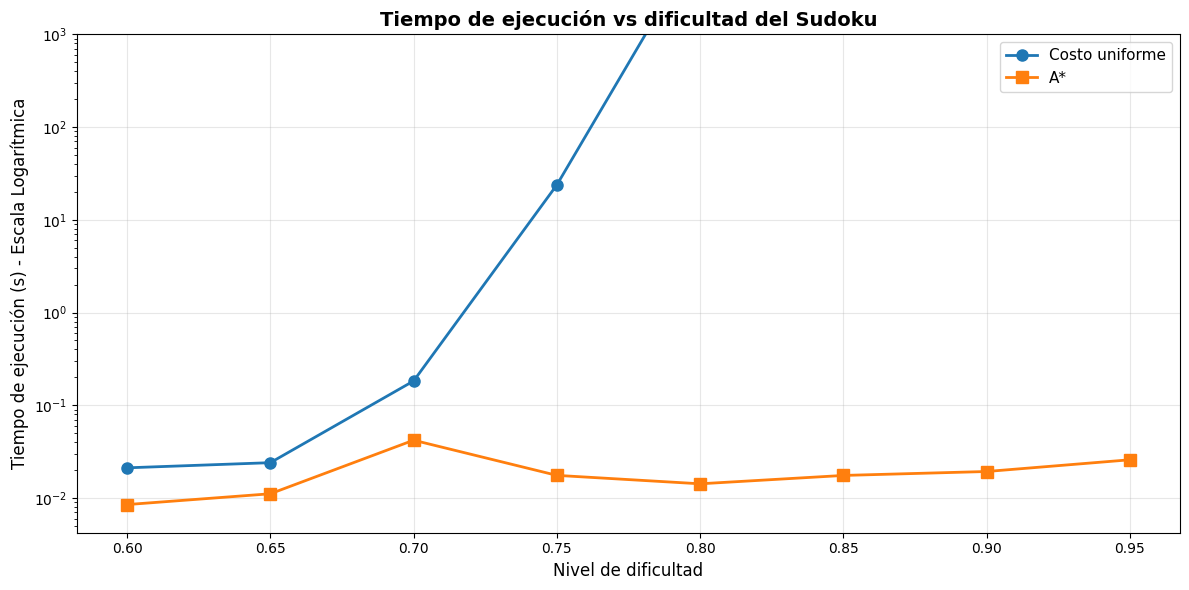

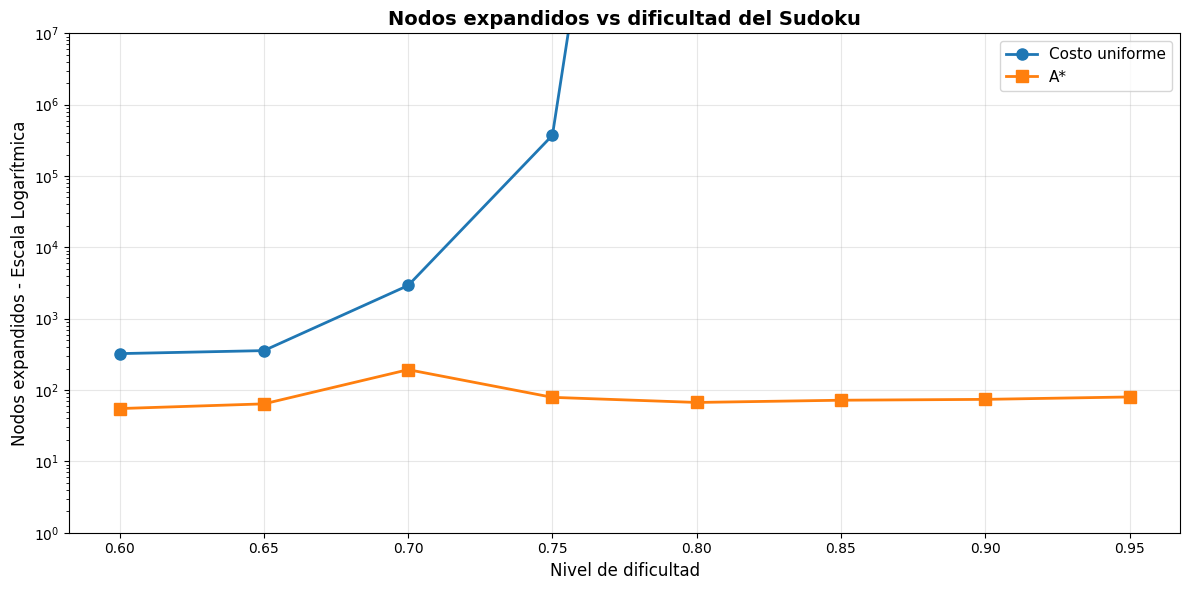

C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\2588174855.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0,10**3)


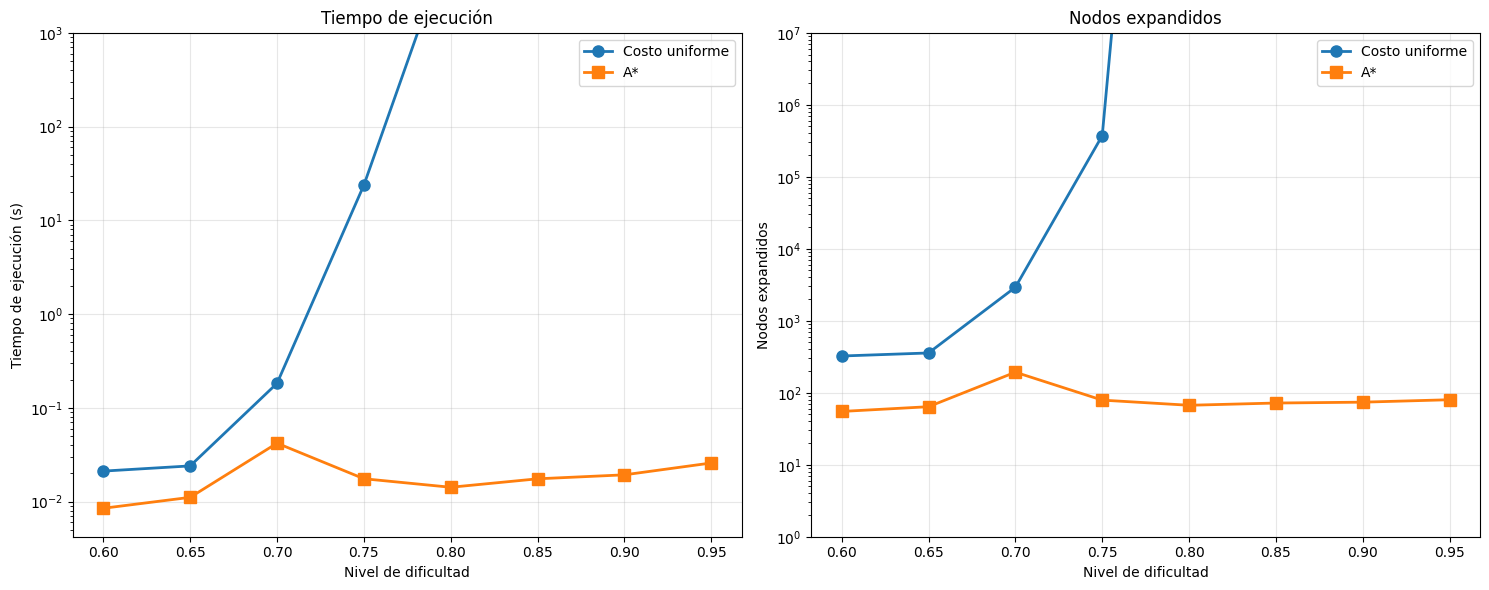

In [13]:
import matplotlib.pyplot as plt

# Niveles de dificultad usados en tu bucle
niveles_dificultad = [0.6 + (i*0.05) for i in range(8)]

# --- Gráfico de tiempos (escala logarítmica) ---
plt.figure(figsize=(12,6))
plt.semilogy(niveles_dificultad, tiemposC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
plt.semilogy(niveles_dificultad, tiemposA, marker='s', linewidth=2, markersize=8, label="A*")
plt.xlabel("Nivel de dificultad", fontsize=12)
plt.ylabel("Tiempo de ejecución (s) - Escala Logarítmica", fontsize=12)
plt.title("Tiempo de ejecución vs dificultad del Sudoku", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(niveles_dificultad, [f'{d:.2f}' for d in niveles_dificultad])
plt.ylim(0, 10**3)
plt.tight_layout()
plt.show()

# --- Gráfico de nodos expandidos (escala logarítmica) ---
plt.figure(figsize=(12,6))
plt.semilogy(niveles_dificultad, nodosExpandidosC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
plt.semilogy(niveles_dificultad, nodosExpandidosA, marker='s', linewidth=2, markersize=8, label="A*")
plt.xlabel("Nivel de dificultad", fontsize=12)
plt.ylabel("Nodos expandidos - Escala Logarítmica", fontsize=12)
plt.title("Nodos expandidos vs dificultad del Sudoku", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(niveles_dificultad, [f'{d:.2f}' for d in niveles_dificultad])
plt.ylim(1, 10**7)  # Límite del eje Y hasta 10^7
plt.tight_layout()
plt.show()
# --- Gráfico adicional: Comparación lado a lado ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Tiempos
ax1.semilogy(niveles_dificultad, tiemposC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
ax1.semilogy(niveles_dificultad, tiemposA, marker='s', linewidth=2, markersize=8, label="A*")
ax1.set_xlabel("Nivel de dificultad")
ax1.set_ylabel("Tiempo de ejecución (s)")
ax1.set_title("Tiempo de ejecución")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(niveles_dificultad)
ax1.set_xticklabels([f'{d:.2f}' for d in niveles_dificultad])
ax1.set_ylim(0,10**3)

# Nodos expandidos
ax2.semilogy(niveles_dificultad, nodosExpandidosC, marker='o', linewidth=2, markersize=8, label="Costo uniforme")
ax2.semilogy(niveles_dificultad, nodosExpandidosA, marker='s', linewidth=2, markersize=8, label="A*")
ax2.set_xlabel("Nivel de dificultad")
ax2.set_ylabel("Nodos expandidos")
ax2.set_title("Nodos expandidos")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(niveles_dificultad)
ax2.set_xticklabels([f'{d:.2f}' for d in niveles_dificultad])
ax2.set_ylim(1, 10**7)

plt.tight_layout()

# Guardar la gráfica de comparación
#plt.savefig('comparacion_sudoku_algoritmos.png', dpi=300, bbox_inches='tight')
#plt.savefig('comparacion_sudoku_algoritmos.pdf', bbox_inches='tight')
#print("Gráficas guardadas como:")
#print("- comparacion_sudoku_algoritmos.png (alta resolución)")
#print("- comparacion_sudoku_algoritmos.pdf (vectorial)")

plt.show()

Ahora veamos más datos entre los intervalos que parecen ser críticos para ambos algoritmos, es decir, entre el 0.7 y el 0.75. Veamos más información resultante de esto.

In [16]:
import random as rd
tiemposC=[]
tiemposA=[]
nodosExpandidosC=[]
nodosExpandidosA=[]
nodosFronteraC=[]
nodosFronteraA=[]


for i in range(101):
    dificultad = rd.choice([0.71, 0.73])
    
    print("Iteración número {0} con dificultad {1} ".format(i,dificultad), end="\n")
    T = Sudoku(3).difficulty(dificultad)
    T = transformar_tablero(T.board)
    problem = SudokuProblem(T)
    _, statsA = aStarSearchInstrumentado(problem,sudokuHeuristic)
    tA = statsA['tiempo_fin']-statsA['tiempo_inicio']
    tiemposA.append(tA)
    nodosExpandidosA.append(statsA['nodos_expandidos'])
    nodosFronteraA.append(statsA['nodos_en_frontera_max'])
    _, statsC = uniformCostSearchInstrumentado(problem)
    tC = statsC['tiempo_fin']-statsC['tiempo_inicio']
    tiemposC.append(tC)
    nodosExpandidosC.append(statsC['nodos_expandidos'])
    nodosFronteraC.append(statsC['nodos_en_frontera_max'])
        

Iteración número 0 con dificultad 0.73 
Iteración número 1 con dificultad 0.73 
Iteración número 2 con dificultad 0.73 
Iteración número 3 con dificultad 0.73 
Iteración número 4 con dificultad 0.73 
Iteración número 5 con dificultad 0.73 
Iteración número 6 con dificultad 0.73 
Iteración número 7 con dificultad 0.73 
Iteración número 8 con dificultad 0.73 
Iteración número 9 con dificultad 0.73 
Iteración número 10 con dificultad 0.73 
Iteración número 11 con dificultad 0.73 
Iteración número 12 con dificultad 0.73 
Iteración número 13 con dificultad 0.73 
Iteración número 14 con dificultad 0.73 
Iteración número 15 con dificultad 0.73 
Iteración número 16 con dificultad 0.73 
Iteración número 17 con dificultad 0.73 
Iteración número 18 con dificultad 0.73 
Iteración número 19 con dificultad 0.73 
Iteración número 20 con dificultad 0.73 
Iteración número 21 con dificultad 0.73 
Iteración número 22 con dificultad 0.73 
Iteración número 23 con dificultad 0.73 
Iteración número 24 con di

C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\1843555001.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\1843555001.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_36120\1843555001.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])


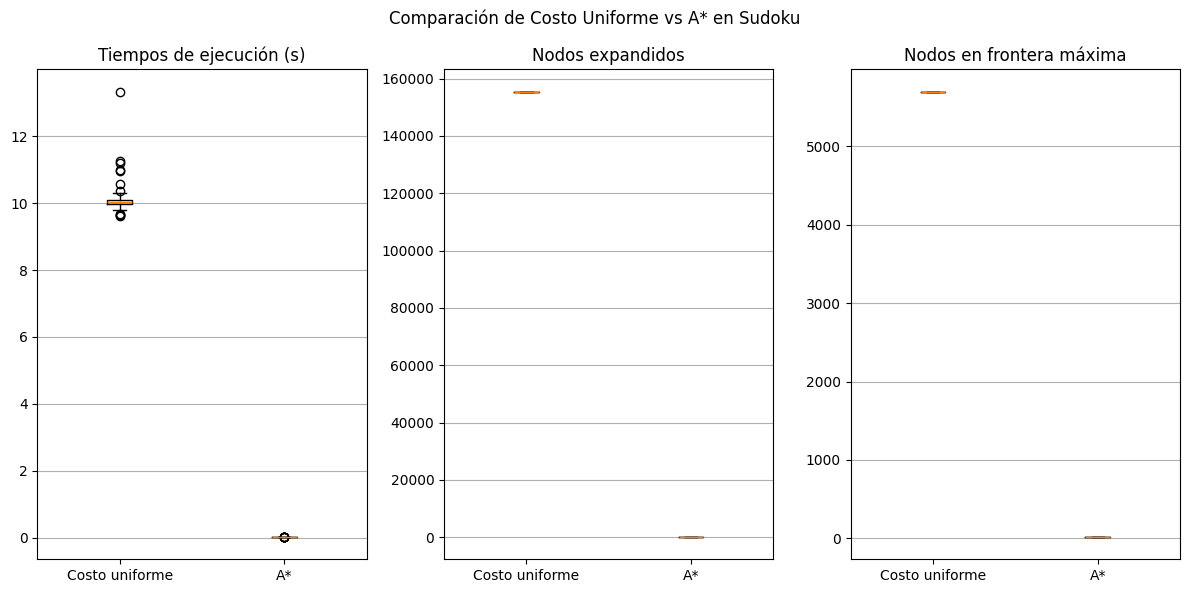

In [17]:
# Datos y etiquetas para iterar más fácil
datos = [
    (tiemposC, tiemposA, "Tiempos de ejecución (s)"),
    (nodosExpandidosC, nodosExpandidosA, "Nodos expandidos"),
    (nodosFronteraC, nodosFronteraA, "Nodos en frontera máxima")
]

plt.figure(figsize=(12, 6))

for i, (costoU, aStar, titulo) in enumerate(datos, 1):
    plt.subplot(1, 3, i)
    plt.boxplot([costoU, aStar], labels=["Costo uniforme", "A*"])
    plt.title(titulo)
    plt.grid(True, axis="y")

plt.suptitle("Comparación de Costo Uniforme vs A* en Sudoku")
plt.tight_layout()
plt.show()

In [19]:
promedioTiempoC = statistics.mean(tiemposC)
promedioTiempoA = statistics.mean(tiemposA)
promedioExpansionC = statistics.mean(nodosExpandidosC)
promedioExpansionA = statistics.mean(nodosExpandidosA)
promedioFronteraC = statistics.mean(nodosFronteraC)
promedioFronteraA = statistics.mean(nodosFronteraA)

print("Promedio de tiempos: Costo Uniforme:{0}, A*:{1}\n".format(promedioTiempoC,promedioTiempoA))
print("Promedio de expansión: Costo Uniforme:{0}, A*:{1}\n".format(promedioExpansionC,promedioExpansionA))
print("Promedio de nodos en frontera: Costo Uniforme:{0}, A*:{1}\n".format(promedioFronteraC,promedioFronteraA))

Promedio de tiempos: Costo Uniforme:10.102282871114145, A*:0.019450100341645796

Promedio de expansión: Costo Uniforme:155437, A*:90

Promedio de nodos en frontera: Costo Uniforme:5700, A*:17

